# Custom emitters distribution


In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc13


In [2]:
from jetset.jet_emitters import EmittersDistribution

you need to define a function that describes your functional form (use numpy functions to make the code more performant)

In [3]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

then you have to link the parmeters in your funtcion to a  paramters of the `EmittersDistribution` class. 

In [4]:
print('allowed_sepctral types for phenomenological constraining',EmittersDistribution.spectral_types_obs_constrain())

allowed_sepctral types for phenomenological constraining ['bkn', 'plc', 'lp', 'lppl', 'pl', 'lpep', 'array']


In [5]:
n_e_super_exp=EmittersDistribution('super_exp',spectral_type='user_defined')
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')


now you have to link your defined functional form  to the `EmittersDistribution` class.

In [6]:
n_e_super_exp.set_distr_func(distr_func_super_exp)

parameters can be easily set

In [7]:
n_e_super_exp.parameters.s.val=.4
n_e_super_exp.parameters.s.val=2.0
n_e_super_exp.parameters.gamma_cut.val=1E5
n_e_super_exp.normalize=True
n_e_super_exp.parameters.gmax.val=1E6

In [8]:
n_e_super_exp.parameters.show_pars()

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+05,1.000000e+00,--,False,False
s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
a,spectral_curvature,,1.800000e+00,0.000000e+00,1.000000e+02,False,False


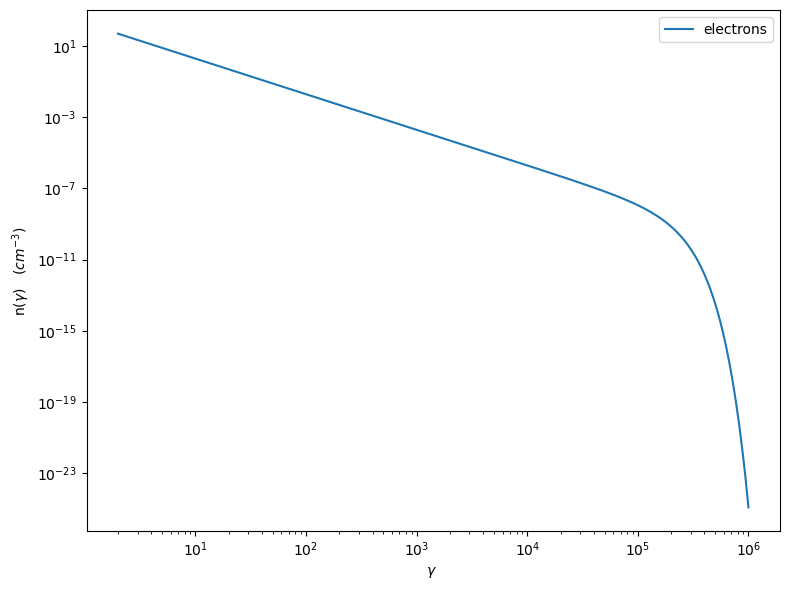

In [9]:
p=n_e_super_exp.plot()

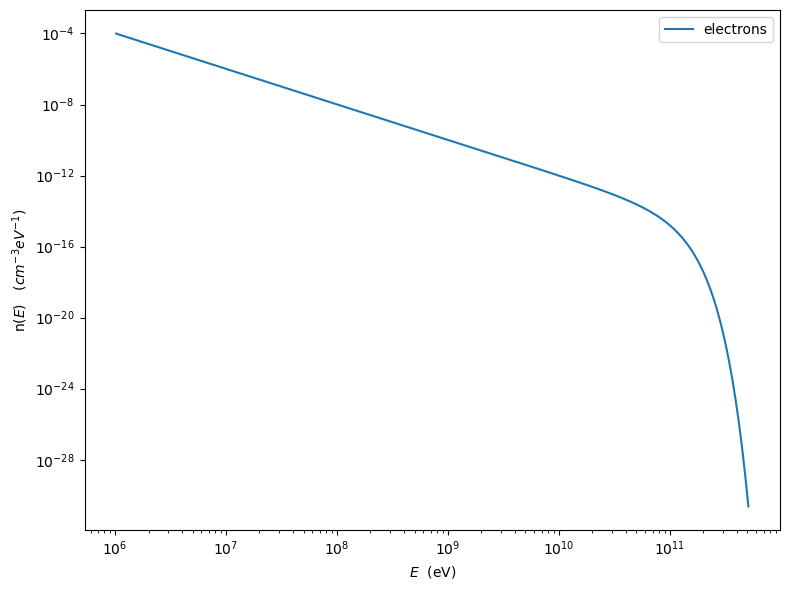

In [10]:
p=n_e_super_exp.plot(energy_unit='eV')

here we define a bkn power-law

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
gamma_break,turn-over-energy,lorentz-factor*,1.000000e+03,1.000000e+00,--,False,False
s1,LE_spectral_slope,,2.500000e+00,-1.000000e+01,1.000000e+01,False,False
s2,HE_spectral_slope,,3.200000e+00,-1.000000e+01,1.000000e+01,False,False


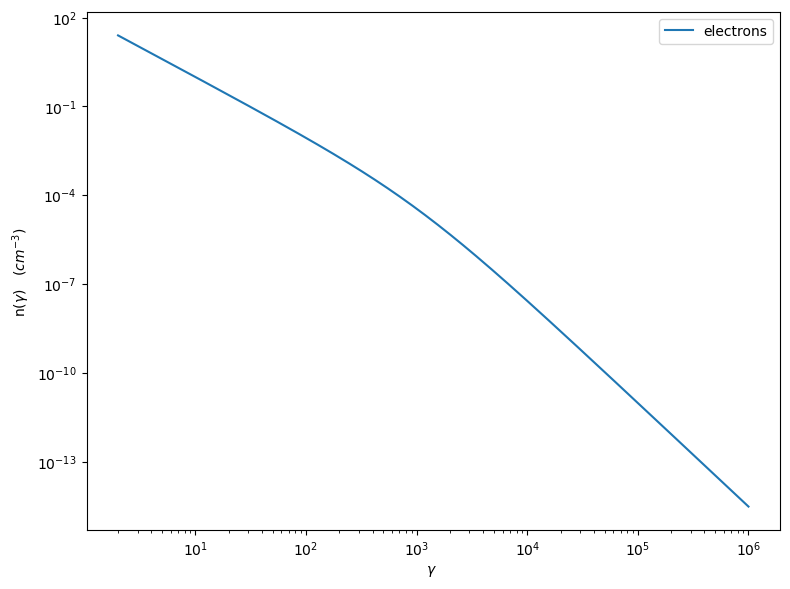

In [11]:

def distr_func_bkn(gamma_break,gamma,s1,s2):
    return np.power(gamma,-s1)*(1.+(gamma/gamma_break))**(-(s2-s1))

n_e_bkn=EmittersDistribution('bkn',spectral_type='bkn')
n_e_bkn.add_par('gamma_break',par_type='turn-over-energy',val=1E3,vmin=1., vmax=None, unit='lorentz-factor')
n_e_bkn.add_par('s1',par_type='LE_spectral_slope',val=2.5,vmin=-10., vmax=10, unit='')
n_e_bkn.add_par('s2',par_type='HE_spectral_slope',val=3.2,vmin=-10., vmax=10, unit='')
n_e_bkn.set_distr_func(distr_func_bkn)
n_e_bkn.parameters.show_pars()
n_e_bkn.parameters.s1.val=2.0
n_e_bkn.parameters.s2.val=3.5
p=n_e_bkn.plot()

##  Passing the custom distribution to the Jet class

In [12]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_bkn)

**now the ``n_e_bkn`` will be deep copyed, so changes applied to the one passed to the model will not affect the original one**

In [13]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,5.000000e+04,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,1.000000e+03,1.000000e+00,--,False,False
jet_leptonic,s1,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


Since as default, the `Nomralization` is false, let's check the actual number density of particles and conpare it to the parameter `N`

In [14]:
print('N_particle=',my_jet.emitters_distribution.eval_N(),'N parameter=',my_jet.parameters.N.val)

N_particle= 24608.46344775512 N parameter= 50000.0


In [15]:
my_jet.eval()


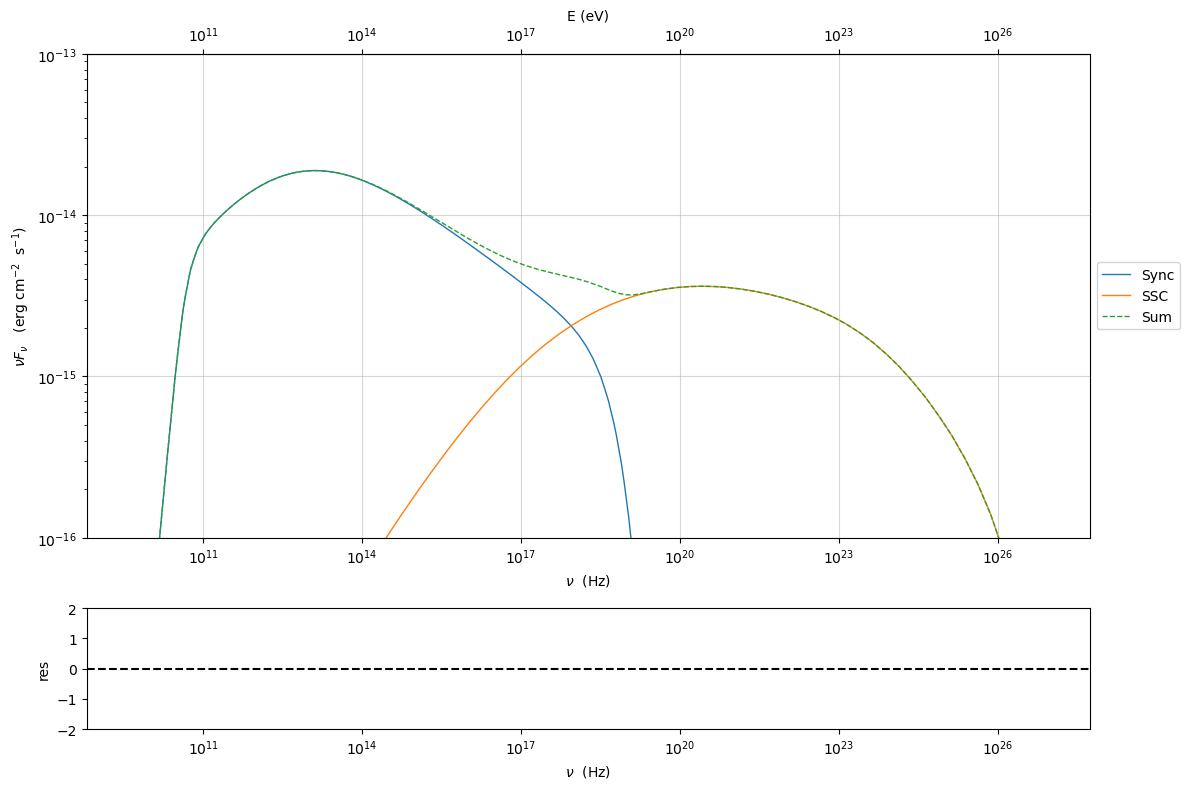

In [17]:
p=my_jet.plot_model()
p.setlim(y_min=1E-16,y_max=1E-13)

Now we switch on the normalization for the emetters distribtuion, and we keep all the parameters unchanged, including N

In [18]:
my_jet.Norm_distr = True
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,5.000000e+04,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,1.000000e+03,1.000000e+00,--,False,False
jet_leptonic,s1,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


and we check again the actual number density of particles and conpare it to the parameter N

In [19]:

print('N_particle=',my_jet.emitters_distribution.eval_N(),'N parameter=',my_jet.parameters.N.val)

N_particle= 50000.0 N parameter= 50000.0


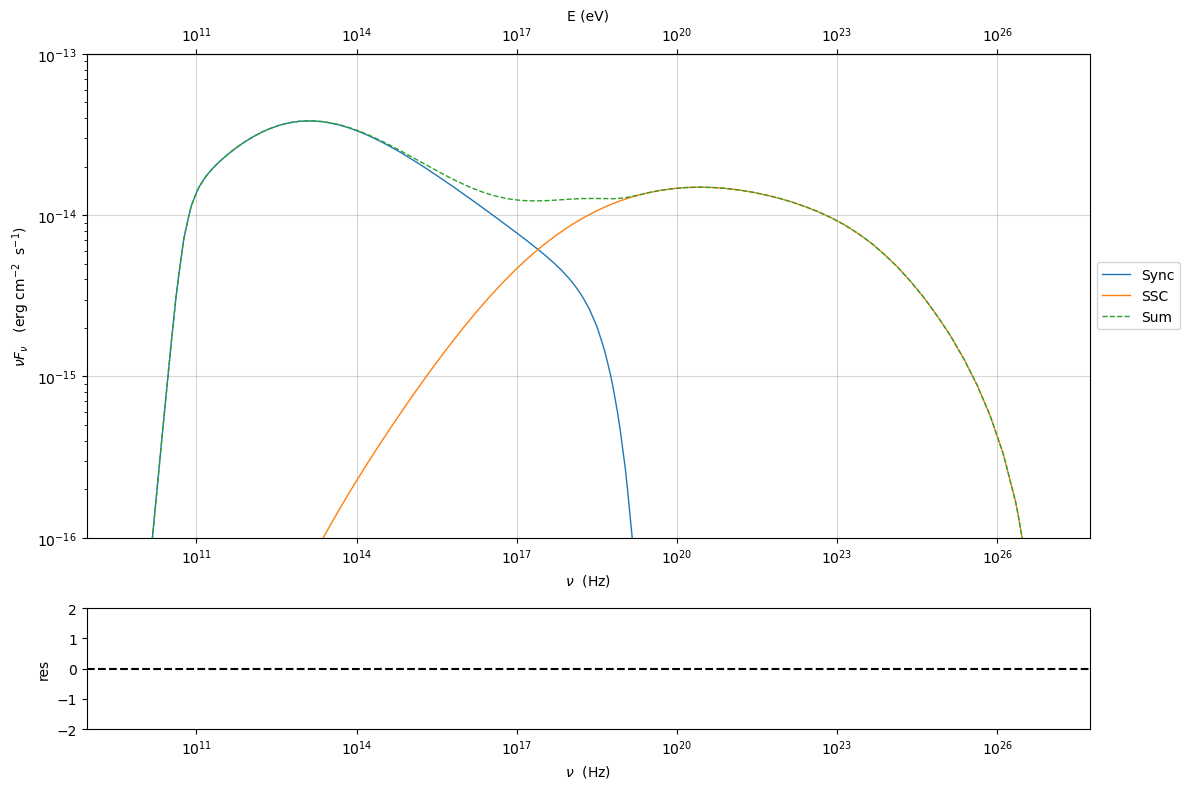

In [21]:
p=my_jet.plot_model()
p.setlim(y_min=1E-16,y_max=1E-13)

##  Building a distribution from an external array

Here we just build two arrays, but you can pass any ``n_gamma`` and ``gamma`` array wit the same size, and with ``gamma>1`` and ``n_gamma>0``

In [22]:
from jetset.jet_emitters import EmittersArrayDistribution
import numpy as np

# gamma array
gamma = np.logspace(1, 8, 500)

# gamma array this is n(\gamma) in 1/cm^3/gamma
n_gamma = gamma ** -2 * 1E-5 * np.exp(-gamma / 1E5)

N1 = np.trapz(n_gamma, gamma)

n_distr = EmittersArrayDistribution(name='array_distr', emitters_type='electrons', gamma_array=gamma, n_gamma_array=n_gamma,normalize=False)

N2 = np.trapz(n_distr._array_n_gamma, n_distr._array_gamma)

``N1`` and ``N2`` are used only for the purpose of checking, you can skip them

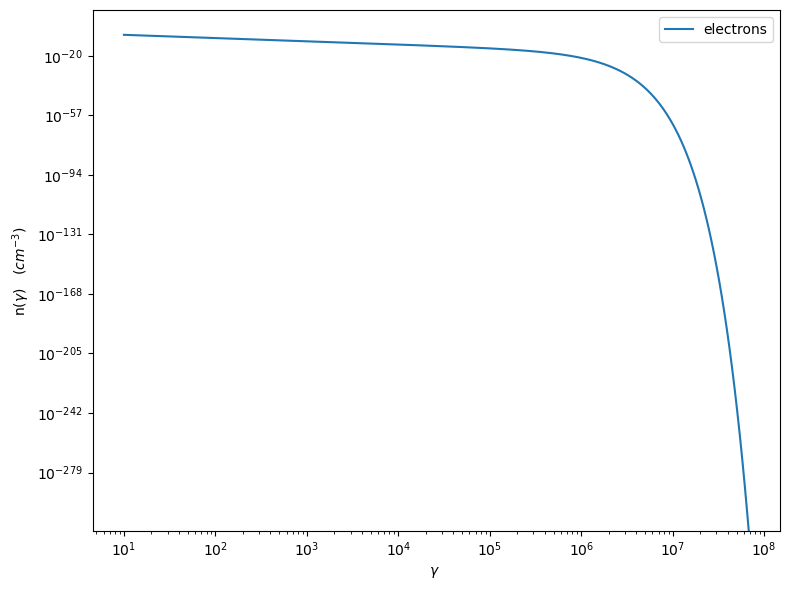

In [23]:
p=n_distr.plot()

In [24]:
my_jet = Jet(emitters_distribution=n_distr, verbose=False)
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: array_distr  
 gamma energy grid size:  501
 gmin grid : 1.000000e+01
 gmax grid : 1.000000e+08
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,scaling_factor,,1.000000e+00,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


you can also skip the next cell, it is just to check

In [25]:

N3 = np.trapz(my_jet.emitters_distribution.n_gamma_e, my_jet.emitters_distribution.gamma_e)

np.testing.assert_allclose(N1, N2, rtol=1E-5)
np.testing.assert_allclose(N1, N3, rtol=1E-2)
np.testing.assert_allclose(N1, my_jet.emitters_distribution.eval_N(), rtol=1E-2)


``N`` will act as a scaling factor for the array when normalization is set to ``False``

In [26]:
my_jet.parameters.N.val=1E9
print('this is the actual number of emitters dendisty %2.2f'%my_jet.emitters_distribution.eval_N(),'this the scaling factor',my_jet.parameters.N.val)

this is the actual number of emitters dendisty 999.56 this the scaling factor 1000000000.0


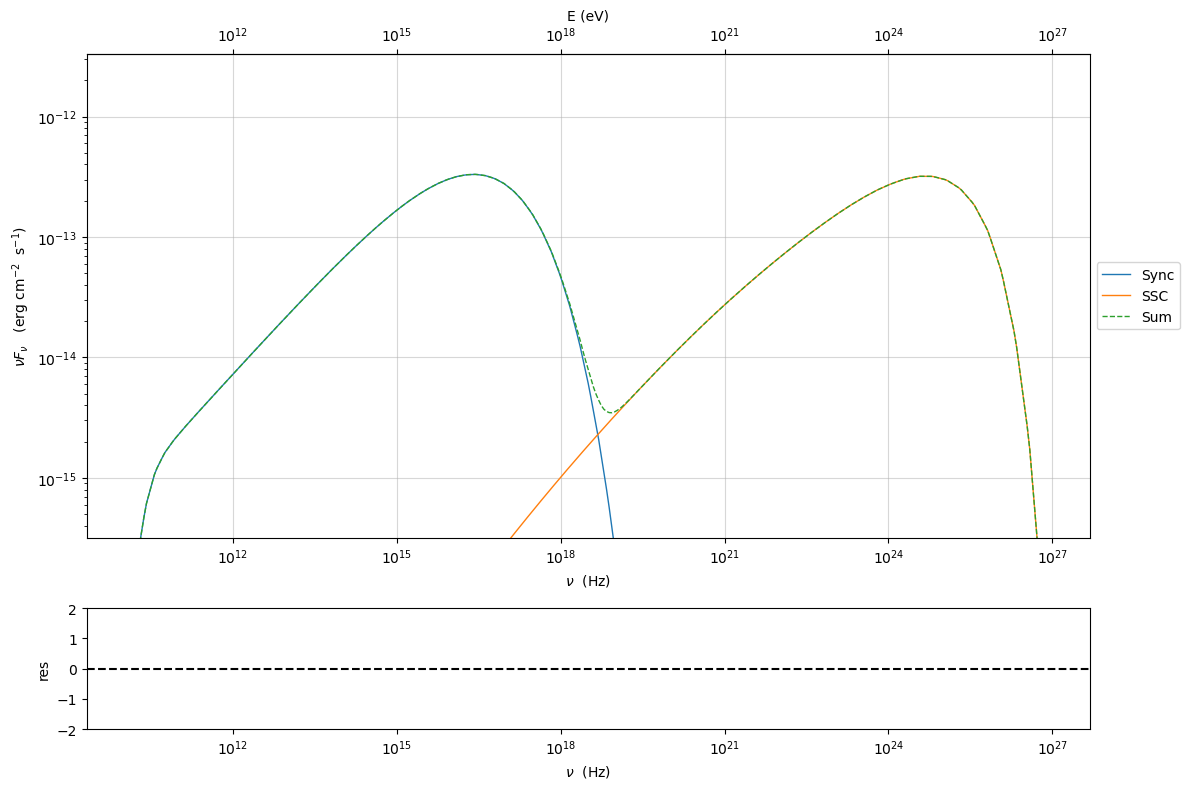

In [27]:
my_jet.eval()
p=my_jet.plot_model()

you can still normalize the distribution

In [28]:
my_jet.Norm_distr = True
my_jet.parameters.N.val=2000
print('this is the actaul number of emitters dendisty %2.2f'%my_jet.emitters_distribution.eval_N(),'this the scaling factor',my_jet.parameters.N.val)

this is the actaul number of emitters dendisty 2000.00 this the scaling factor 2000


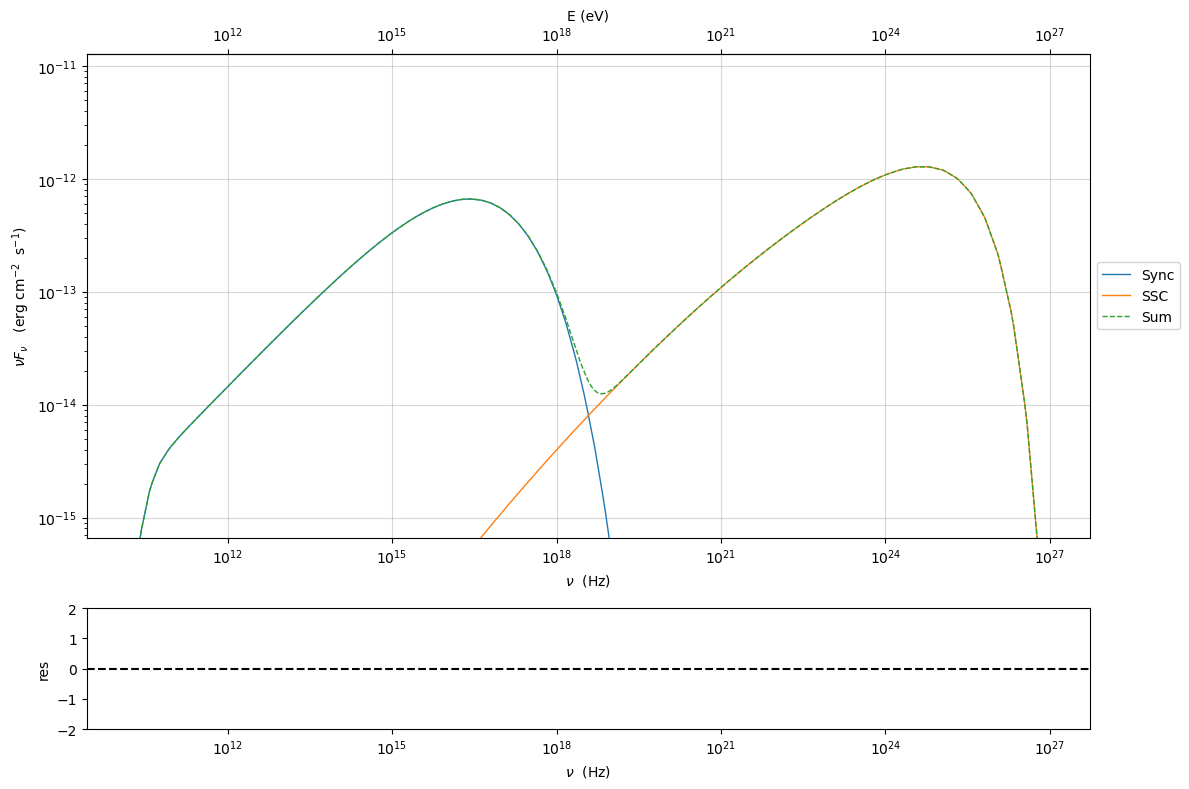

In [29]:
my_jet.eval()
p=my_jet.plot_model()

In [30]:
my_jet.save_model('test_jet_custom_emitters_array.pkl')
new_jet = Jet.load_model('test_jet_custom_emitters_array.pkl')


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.000000e+03,0.000000e+00,--,False,False
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False


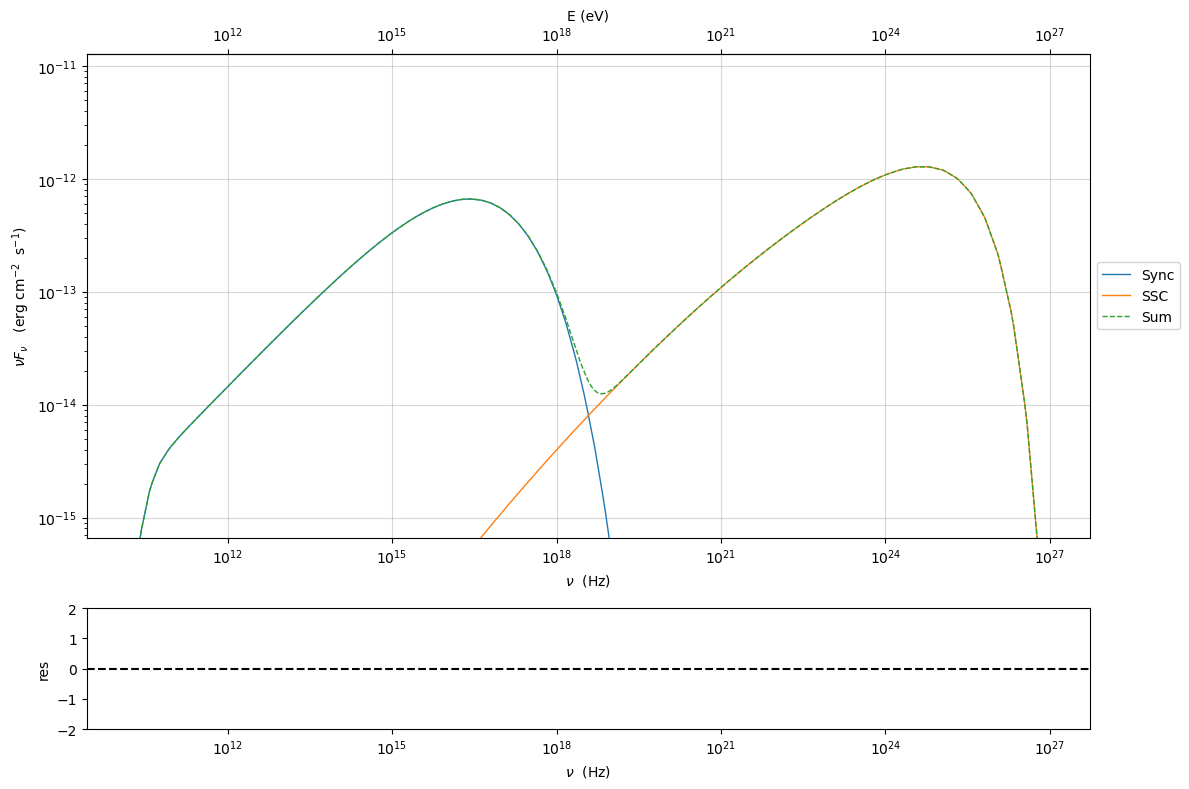

In [31]:
new_jet.eval()
p=new_jet.plot_model()